In [3]:
import numpy as np
import pickle
from qiskit import QuantumCircuit
from qiskit.algorithms.gradients import *
from qiskit.algorithms.optimizers import *
from qiskit.circuit import Parameter
from sklearn.decomposition import PCA
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.primitives import Estimator as LocalEstimator
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from typing import List, Literal
from sklearn.model_selection import train_test_split
import pandas as pd

C:\Users\peksi\AppData\Local\Temp\ipykernel_19160\3599940727.py:4: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.gradients import *


c:\Users\peksi\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


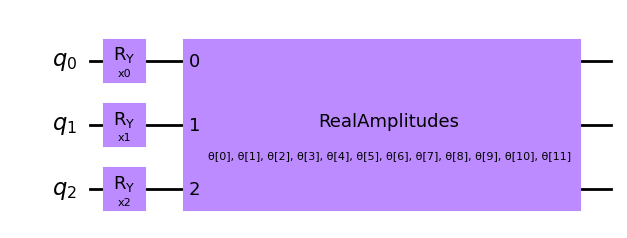

In [2]:
_n_features = 3

feature_map = QuantumCircuit(_n_features)
parameters = []
for i in range(_n_features):
    parameter = Parameter(f"x{i}")
    parameters.append(parameter)
    feature_map.ry(parameter, i)

ansatz = RealAmplitudes(_n_features, reps=_n_features)

qc = QuantumCircuit(_n_features)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw('mpl')

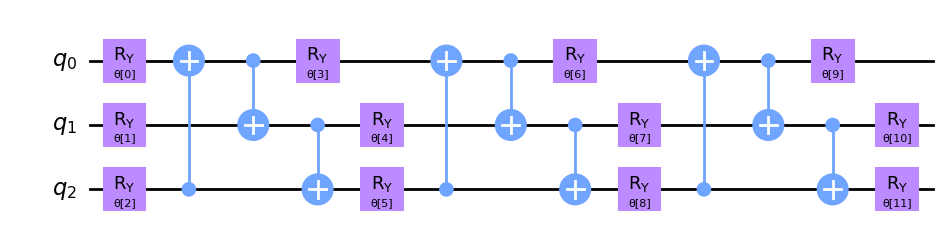

In [5]:
_n_features = 3
qc = QuantumCircuit(_n_features)
ansatz = RealAmplitudes(_n_features, reps=_n_features, entanglement='circular')
qc.compose(ansatz, inplace=True)
qc.decompose().draw('mpl')

c:\Users\peksi\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


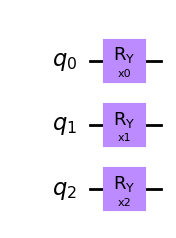

In [5]:
_n_features = 3
feature_map = QuantumCircuit(_n_features)
parameters = []
for i in range(_n_features):
    parameter = Parameter(f"x{i}")
    parameters.append(parameter)
    feature_map.ry(parameter, i)
feature_map.draw('mpl')

In [1]:
bombo = [0.0675200700784763, 0.06495122927497927, 0.060791222003448296, 0.05746943210462434, 0.05512206142042413, 0.04526525374107622, 0.13526959517423676, 0.03977957933962776, 0.06038522896766188, 0.03542598442820852, 0.03242463056539486, 0.029443534443205358, 0.026839512108513652, 0.023441087106546868, 0.02087261484382271, 0.018816758658432284, 0.018125776134369512, 0.017701216202435657, 0.017180810793314898, 0.016564923454231488, 0.01574353211272586, 0.015247371052273502, 0.015000495005219328, 0.014663676002328818, 0.014291331330541335, 0.013937806964190336, 0.01362715484775431, 0.013438145243109325, 0.013330136564080634, 0.013235203968773644, 0.013145985810580966, 0.013021451748254686, 0.01286780112363204, 0.012716503718886888, 0.012640621758161065, 0.01260637788884162, 0.01258334727765199, 0.012551181481210176, 0.012507952087504114, 0.012474823148209125, 0.012421331694501589, 0.012345564317649355, 0.012266893812486045, 0.012224340754087407, 0.01219309031469931, 0.01216899237601474, 0.012146750417023504, 0.012106671780083856, 0.012050259866462134, 0.012016107460061144, 0.011997238275082138, 0.011981879935155405, 0.011965750022975548, 0.011945514620505892, 0.011908870709575293, 0.011877559688299654, 0.011848598253160206, 0.011835903244733326, 0.011825337705283876, 0.011797820875970685, 0.011757001491312287, 0.011712128696233812, 0.011688622134082975, 0.011677273300821203, 0.011663495475098738, 0.011644230929282538, 0.011602715145097227, 0.011541075787258537, 0.011485277452628144, 0.011451713109302708, 0.011432883105622281, 0.011417449114344475, 0.011398129755712456, 0.011364655572392699, 0.011316928309224225, 0.01124010744808705, 0.011189556608191827, 0.01117287443552142, 0.01116592930832129, 0.01115281586397563, 0.0111406808703401, 0.011114469189981954, 0.011086102645925019, 0.011066429068028651, 0.011055337490945477, 0.011049468149322249, 0.011044556159512744, 0.011035312716426639, 0.011015701056736233, 0.010977301076751697, 0.010940369901536805, 0.010922517758552349, 0.01091659119016715, 0.010910818640245555, 0.010905445198118221, 0.01089816547573027, 0.010887662133271185, 0.010871119965968658, 0.0108538259930581, 0.010840311357528812, 0.010831853251582733, 0.010827720128103353]

print(len(bombo))

102
